Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing the dataset

In [2]:
zomato_df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
cc_df = pd.read_excel(r'Country-Code.xlsx')
cc_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Merging both of the dataframe

In [4]:
zom_df = pd.merge(zomato_df, cc_df, on='Country Code')
zom_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Exploratory Data Analysis
Exploring the merged dataset to further analyse the data

In [5]:
zom_df.shape

(9551, 22)

In [6]:
zom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
zom_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
zom_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
zom_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [10]:
numerical_columns = zom_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [11]:
categorical_columns = zom_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')

# Data Visualization

Data distribution using histograms

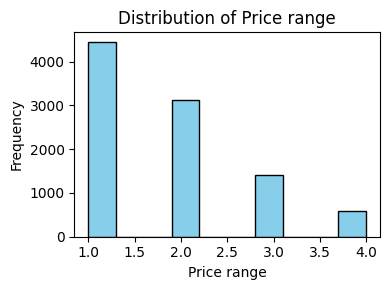

In [12]:
plt.figure(figsize=(4,3))
plt.hist(zom_df['Price range'], color='skyblue', edgecolor='black')
plt.title(f'Distribution of Price range')
plt.xlabel('Price range')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

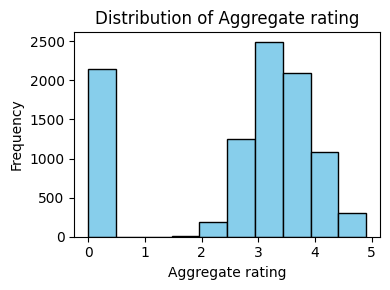

In [13]:
plt.figure(figsize=(4,3))
plt.hist(zom_df['Aggregate rating'], color='skyblue', edgecolor='black')
plt.title(f'Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

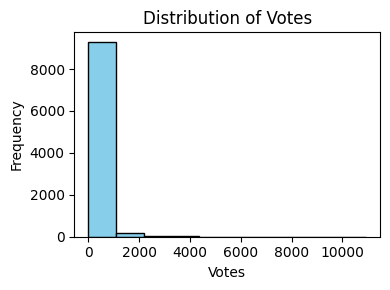

In [14]:
plt.figure(figsize=(4,3))
plt.hist(zom_df['Votes'], color='skyblue', edgecolor='black')
plt.title(f'Distribution of Votes')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

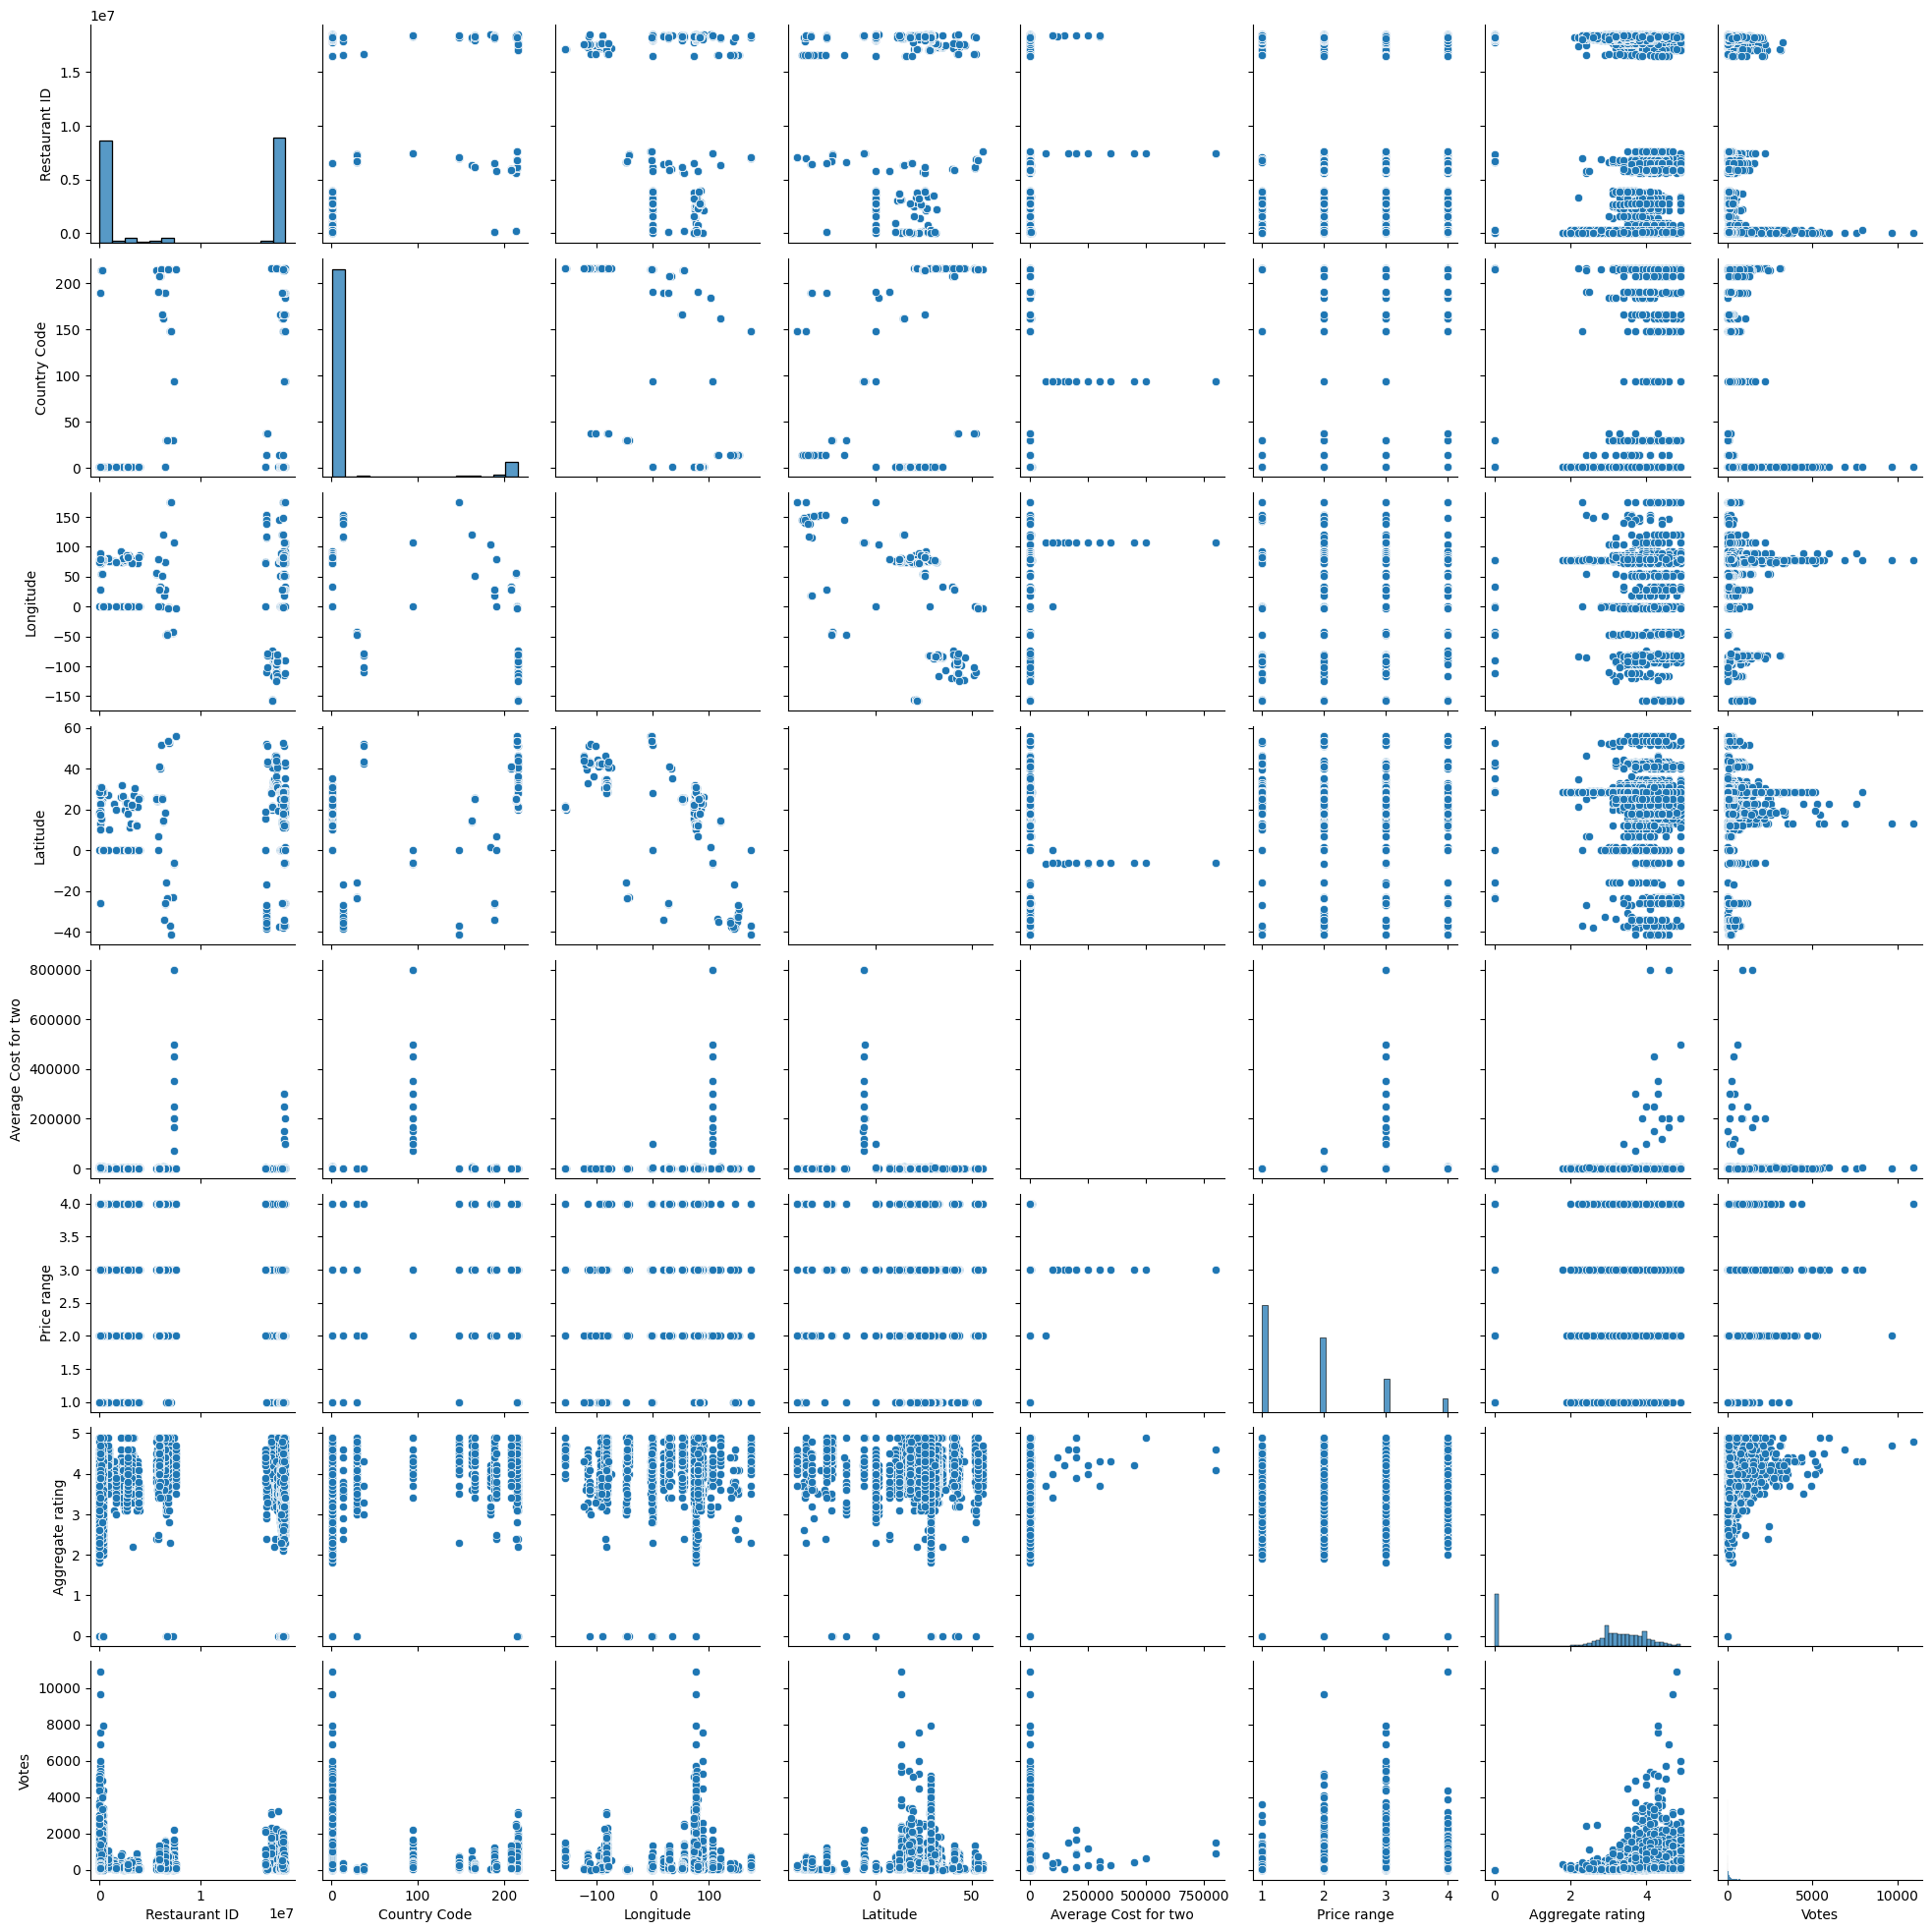

In [15]:
sb.pairplot(zom_df)
plt.show()

Categorical plotting of count

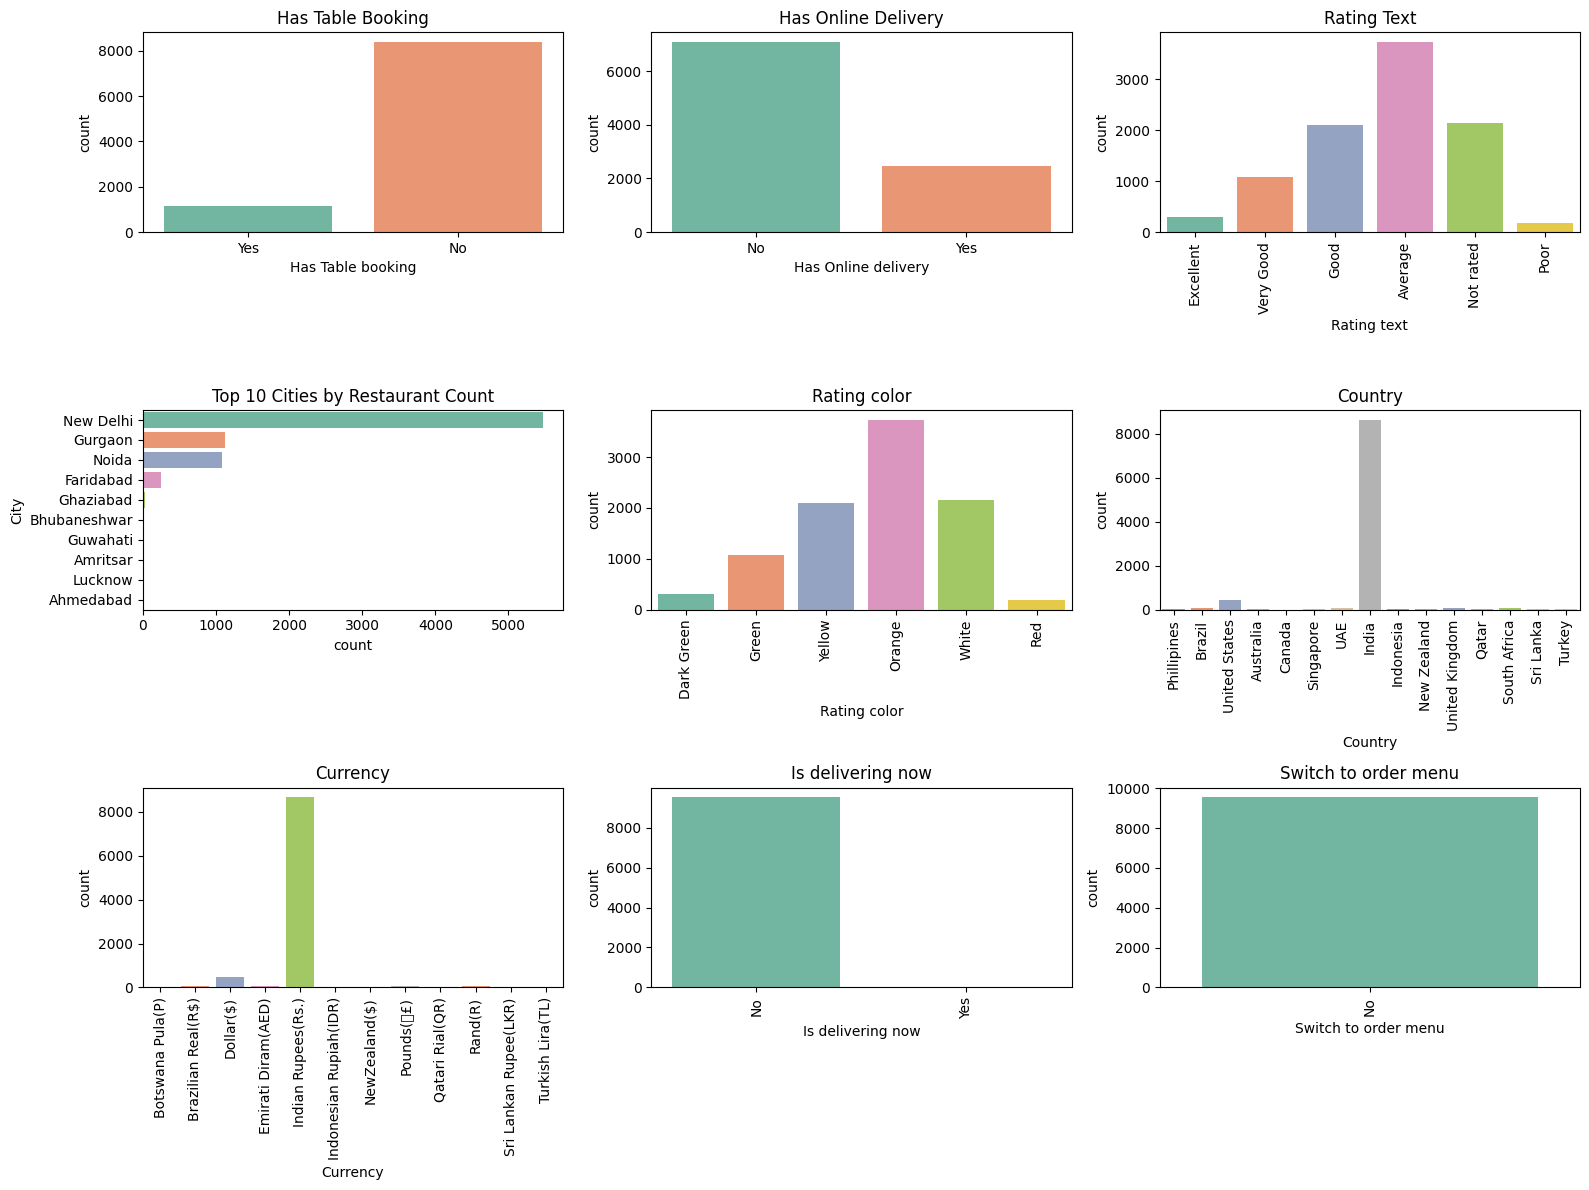

In [16]:
plt.figure(figsize=(16, 12))

plt.subplot(331)
sb.countplot(data=zom_df, x='Has Table booking', palette='Set2')
plt.title('Has Table Booking')

plt.subplot(332)
sb.countplot(data=zom_df, x='Has Online delivery', palette='Set2')
plt.title('Has Online Delivery')

plt.subplot(333)
sb.countplot(data=zom_df, x='Rating text', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Text')

plt.subplot(334)
sb.countplot(data=zom_df, y='City', palette='Set2', order=zom_df['City'].value_counts().index[:10])
plt.title('Top 10 Cities by Restaurant Count')

plt.subplot(335)
sb.countplot(data=zom_df, x='Rating color', palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating color')

plt.subplot(336)
sb.countplot(data=zom_df, x='Country', palette='Set2')
plt.xticks(rotation=90)
plt.title('Country')

plt.subplot(337)
sb.countplot(data=zom_df, x='Currency', palette='Set2')
plt.xticks(rotation=90)
plt.title('Currency')

plt.subplot(338)
sb.countplot(data=zom_df, x='Is delivering now', palette='Set2')
plt.xticks(rotation=90)
plt.title('Is delivering now')

plt.subplot(339)
sb.countplot(data=zom_df, x='Switch to order menu', palette='Set2')
plt.xticks(rotation=90)
plt.title('Switch to order menu')

plt.tight_layout()
plt.show()

Heatmaps and correlation matrix

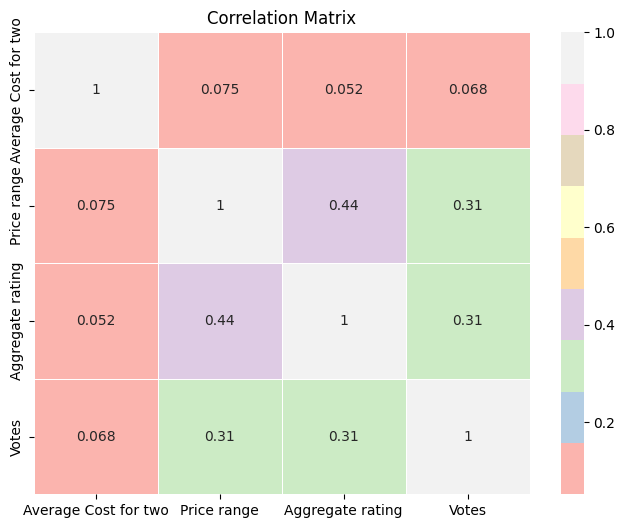

In [17]:
correlation_matrix = zom_df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

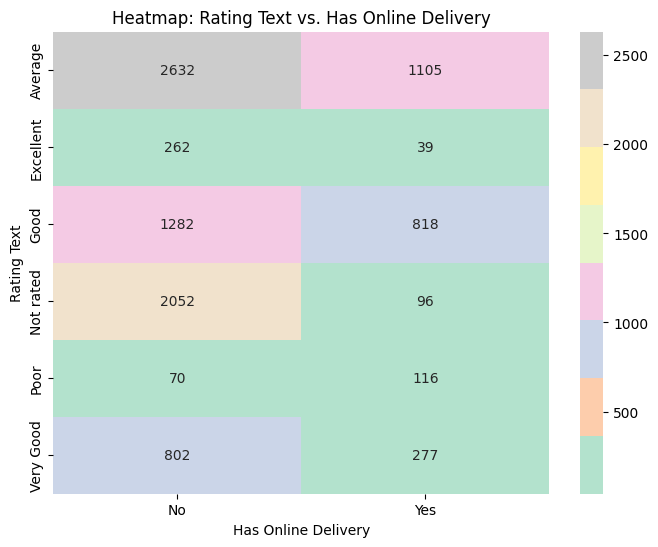

In [18]:
crosstab = pd.crosstab(zom_df['Rating text'], zom_df['Has Online delivery'])
plt.figure(figsize=(8, 6))
sb.heatmap(crosstab, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Rating Text')
plt.show()

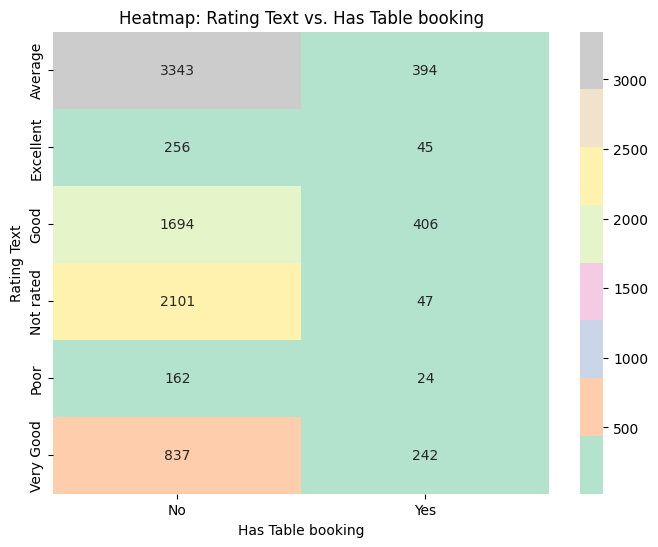

In [19]:
crosstab2 = pd.crosstab(zom_df['Rating text'], zom_df['Has Table booking'])
plt.figure(figsize=(8, 6))
sb.heatmap(crosstab2, annot=True, fmt='d', cmap='Pastel2')
plt.title('Heatmap: Rating Text vs. Has Table booking')
plt.xlabel('Has Table booking')
plt.ylabel('Rating Text')
plt.show()

Boxplots

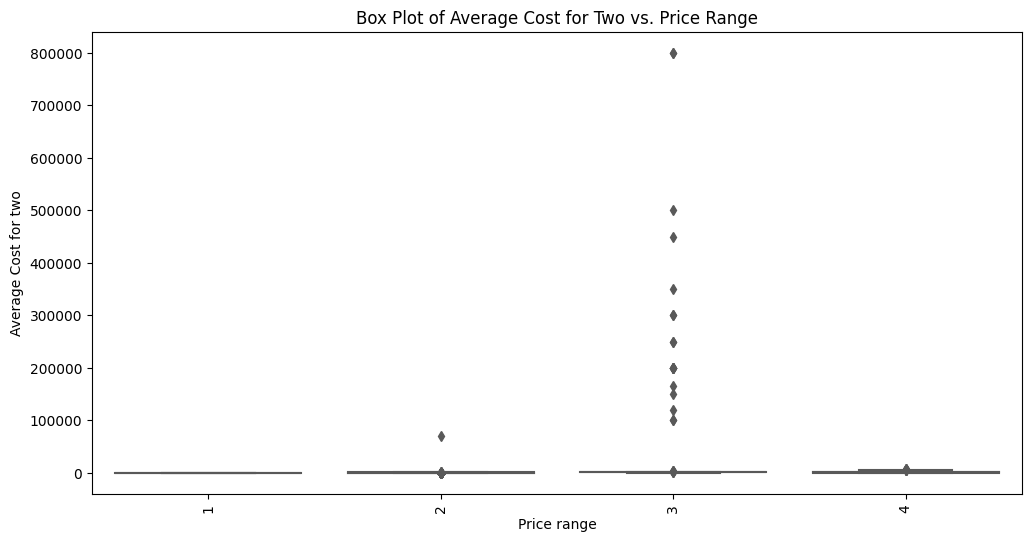

In [20]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Price range', y='Average Cost for two', palette='Set2')
plt.title('Box Plot of Average Cost for Two vs. Price Range')
plt.xticks(rotation=90)
plt.show()

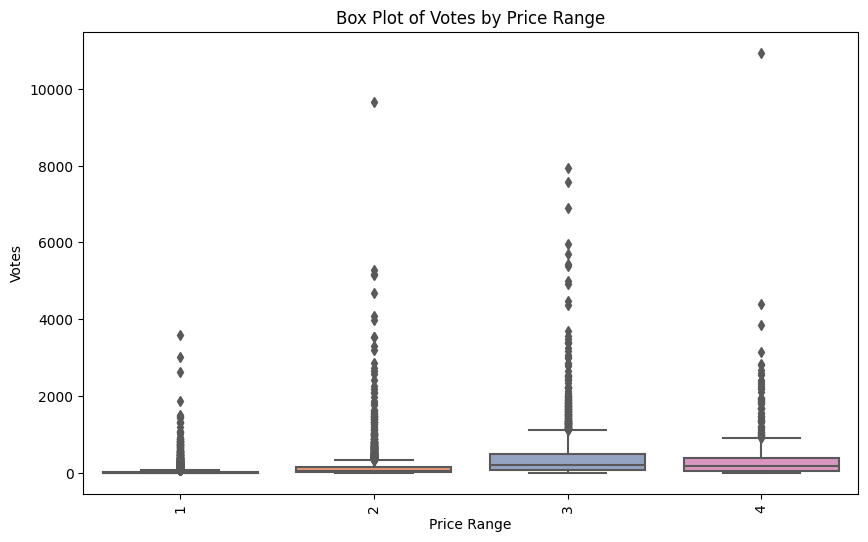

In [21]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=zom_df, x='Price range', y='Votes', palette='Set2')
plt.title('Box Plot of Votes by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

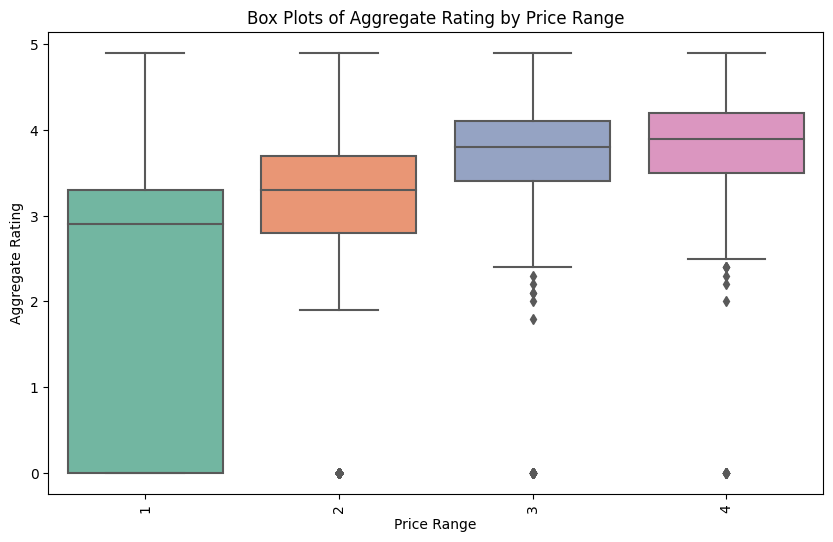

In [22]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=zom_df, x='Price range', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

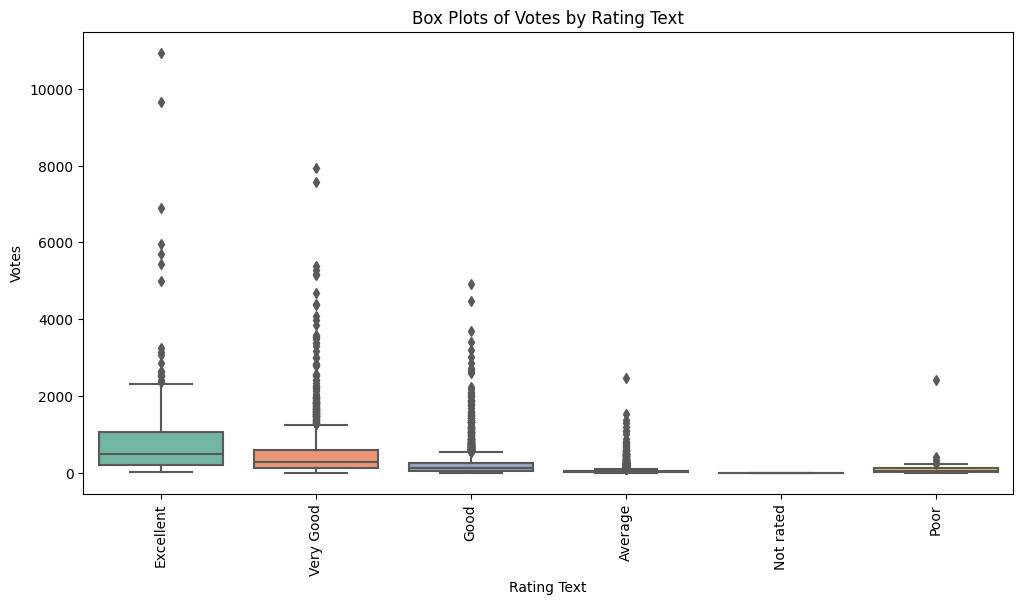

In [23]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Rating text', y='Votes', palette='Set2')
plt.title('Box Plots of Votes by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.show()

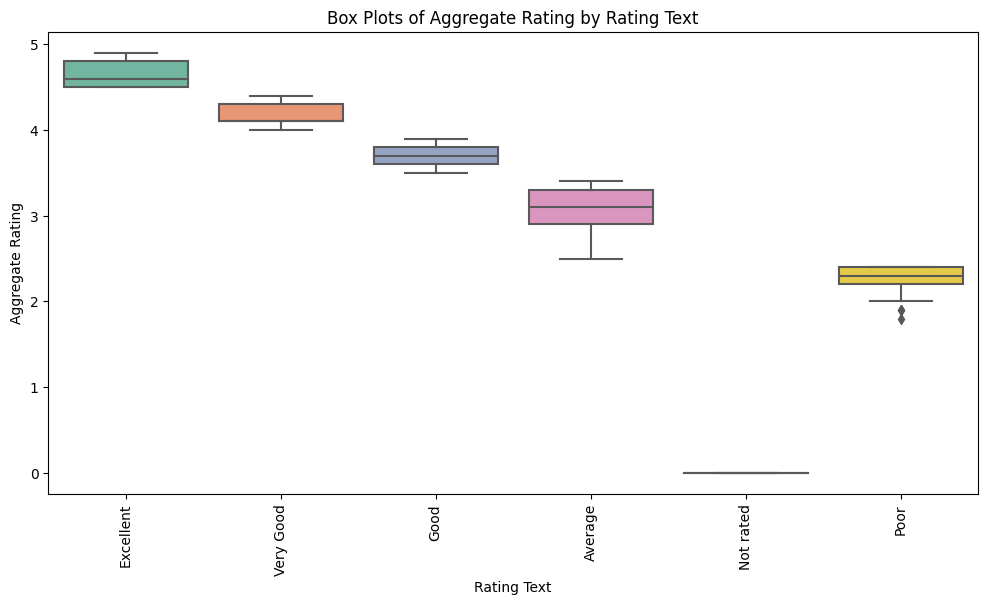

In [24]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=zom_df, x='Rating text', y='Aggregate rating', palette='Set2')
plt.title('Box Plots of Aggregate Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

Piecharts

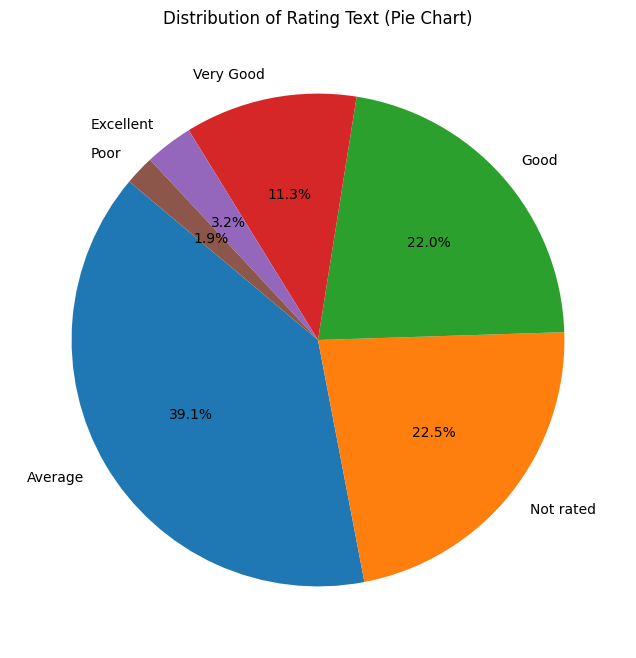

In [25]:
rating_counts = zom_df['Rating text'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Rating Text (Pie Chart)')
plt.show()

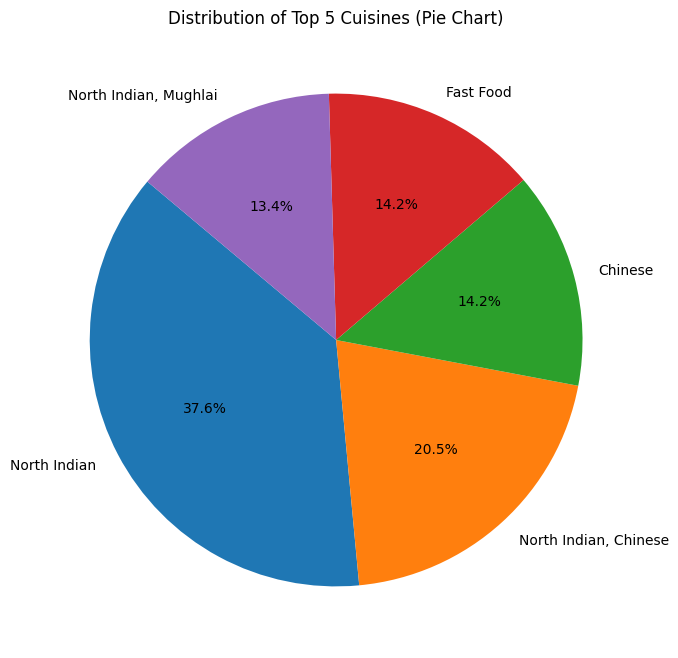

In [26]:
top_cuisines = zom_df['Cuisines'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Cuisines (Pie Chart)')
plt.show()

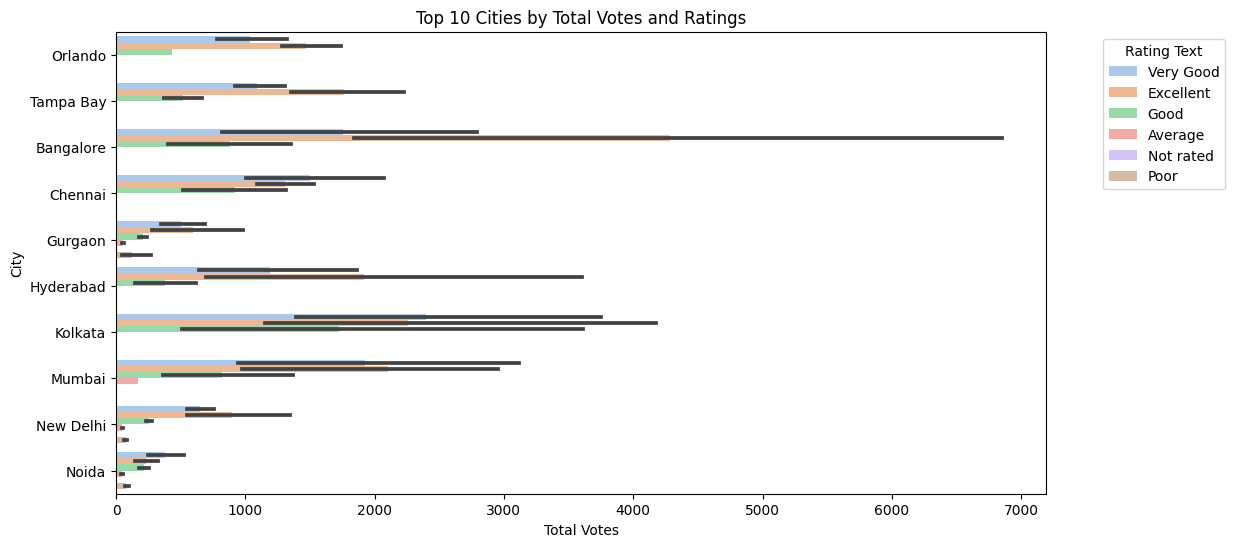

In [27]:
top_cities_by_votes = zom_df.groupby('City')['Votes'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sb.barplot(x='Votes', y='City', hue='Rating text', data=zom_df[zom_df['City'].isin(top_cities_by_votes.index)], palette='pastel')
plt.title('Top 10 Cities by Total Votes and Ratings')
plt.xlabel('Total Votes')
plt.ylabel('City')
plt.legend(title='Rating Text', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

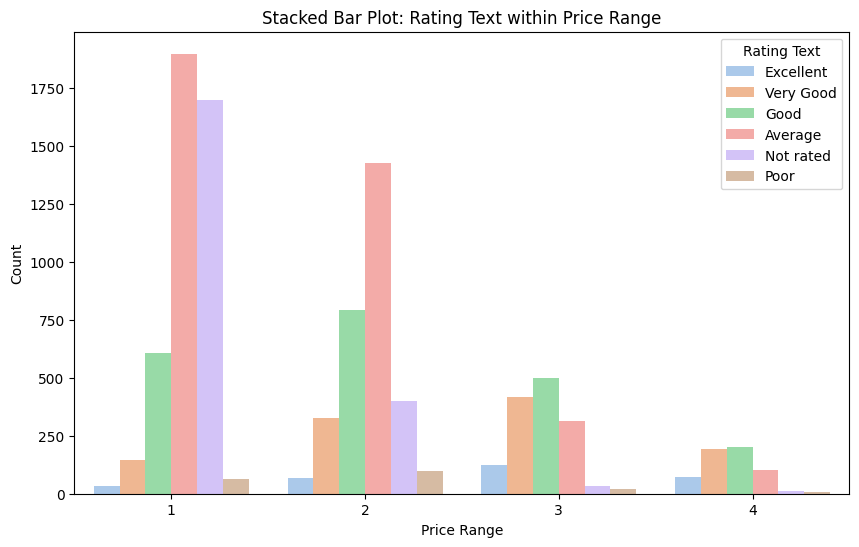

In [28]:
plt.figure(figsize=(10, 6))
sb.countplot(data=zom_df, x='Price range', hue='Rating text', palette='pastel')
plt.title('Stacked Bar Plot: Rating Text within Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Rating Text', loc='upper right')
plt.show()

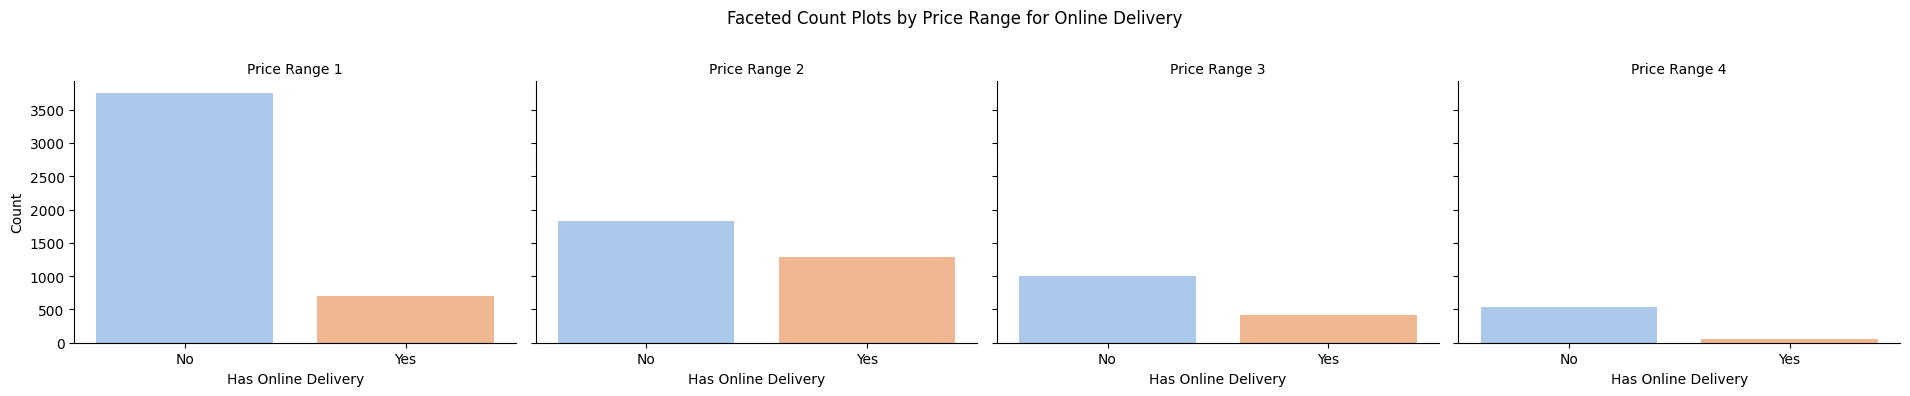

In [29]:
g = sb.FacetGrid(zom_df, col='Price range', height=4, aspect=1.2)
g.map(sb.countplot, 'Has Online delivery', palette='pastel')
g.set_axis_labels('Has Online Delivery', 'Count')
g.set_titles(col_template='Price Range {col_name}')
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Faceted Count Plots by Price Range for Online Delivery')
plt.show()

## Data Preprocessing

In [30]:
zom_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


Encoding the data

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

zom_df['Has Table booking'] = label_encoder.fit_transform(zom_df['Has Table booking'])
zom_df['Has Online delivery'] = label_encoder.fit_transform(zom_df['Has Online delivery'])
zom_df['Is delivering now'] = label_encoder.fit_transform(zom_df['Is delivering now'])
zom_df['Switch to order menu'] = label_encoder.fit_transform(zom_df['Switch to order menu'])
zom_df['Cuisines'] = label_encoder.fit_transform(zom_df['Cuisines'])
zom_df['City'] = label_encoder.fit_transform(zom_df['City'])
zom_df['Rating text'] = label_encoder.fit_transform(zom_df['Rating text'])
zom_df['Rating color'] = label_encoder.fit_transform(zom_df['Rating color'])
zom_df['Locality'] = label_encoder.fit_transform(zom_df['Locality'])
zom_df['Locality Verbose'] = label_encoder.fit_transform(zom_df['Locality Verbose'])
zom_df['Price range'] = label_encoder.fit_transform(zom_df['Price range'])

In [32]:
zom_df = zom_df.drop(['Restaurant Name', 'Address', 'Currency','Restaurant ID', 'Country'], axis=True)

In [33]:
zom_df.head()

,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,73,171,172,121.027535,14.565443,920,1100,1,0,0,0,2,4.8,0,1,314
1,162,73,593,601,121.014101,14.553708,1111,1200,1,0,0,0,2,4.5,0,1,591
2,162,75,308,314,121.056831,14.581404,1671,4000,1,0,0,0,3,4.4,1,5,270
3,162,75,862,875,121.056475,14.585318,1126,1500,0,0,0,0,3,4.9,0,1,365
4,162,75,862,875,121.057508,14.584450,1122,1500,1,0,0,0,3,4.8,0,1,229


Going frward the project is split into two parts. Part one is to predict the average cost for two and the second part is predict the price range.


Splitting the dataste into test and training data for part one of the project to predict the average cost for two.

In [34]:
from sklearn.model_selection import train_test_split

X_cost = zom_df.drop(['Average Cost for two'], axis=1)
y_cost = zom_df['Average Cost for two']

X_cost_train, X_cost_test, y_cost_train, y_cost_test = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)

Scaling the dataset for model building

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_cost_train_scaled = scaler.fit_transform(X_cost_train)
X_cost_test_scaled = scaler.transform(X_cost_test)

## Part One: Model Building and Evaluation for predicting the average cost for two.

Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_linear = linear_reg_model.predict(X_cost_test_scaled)

mse_linear = mean_squared_error(y_cost_test, y_cost_pred_linear)
mae_linear = mean_absolute_error(y_cost_test, y_cost_pred_linear)
r2_linear = r2_score(y_cost_test, y_cost_pred_linear)


cv_scores_linear = cross_val_score(linear_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_linear):.2f}")

Linear Regression Model:
Mean Squared Error (MSE): 371989823.06
Mean Absolute Error (MAE): 1847.46
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14431.49


Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

ridge_reg_model = Ridge()

ridge_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_ridge = ridge_reg_model.predict(X_cost_test_scaled)

mse_ridge = mean_squared_error(y_cost_test, y_cost_pred_ridge)
mae_ridge = mean_absolute_error(y_cost_test, y_cost_pred_ridge)
r2_ridge = r2_score(y_cost_test, y_cost_pred_ridge)

cv_scores_ridge = cross_val_score(ridge_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_ridge = np.sqrt(-cv_scores_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_ridge):.2f}")

Ridge Regression Model:
Mean Squared Error (MSE): 371969713.10
Mean Absolute Error (MAE): 1843.73
R-squared (R2) Score: 0.02
Cross-Validated RMSE: 14430.57


Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_model = RandomForestRegressor()

rf_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_rf = rf_reg_model.predict(X_cost_test_scaled)

mse_rf = mean_squared_error(y_cost_test, y_cost_pred_rf)
mae_rf = mean_absolute_error(y_cost_test, y_cost_pred_rf)
r2_rf = r2_score(y_cost_test, y_cost_pred_rf)


cv_scores_rf = cross_val_score(rf_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf)

print("Random Forest Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_rf):.2f}")

Random Forest Regressor Model:
Mean Squared Error (MSE): 205059353.08
Mean Absolute Error (MAE): 584.71
R-squared (R2) Score: 0.46
Cross-Validated RMSE: 9005.25


 Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gb_reg_model = GradientBoostingRegressor()

gb_reg_model.fit(X_cost_train_scaled, y_cost_train)

y_cost_pred_gb = gb_reg_model.predict(X_cost_test_scaled)

mse_gb = mean_squared_error(y_cost_test, y_cost_pred_gb)
mae_gb = mean_absolute_error(y_cost_test, y_cost_pred_gb)
r2_gb = r2_score(y_cost_test, y_cost_pred_gb)


cv_scores_gb = cross_val_score(gb_reg_model, X_cost_train_scaled, y_cost_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_gb = np.sqrt(-cv_scores_gb)

print("Gradient Boosting Regressor Model:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")
print(f"Cross-Validated RMSE: {np.mean(rmse_cv_gb):.2f}")

Gradient Boosting Regressor Model:
Mean Squared Error (MSE): 200814939.97
Mean Absolute Error (MAE): 534.85
R-squared (R2) Score: 0.47
Cross-Validated RMSE: 11201.97


Based on the results of evaluation, the **Random Forest Regressor** model has the best performance in terms of R-squared (R2) score and Cross-Validated RMSE.

Hyperparameter Tuning: It is performed to improve the model performance and to avoid overfitting Random Forest Regressor

In [40]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
}

rf_reg_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_reg_model, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_cost_train_scaled, y_cost_train)

best_params = grid_search.best_params_

print("Best Hyperparameters for rf_reg_model:", best_params)

best_rf_reg_model = grid_search.best_estimator_

y_cost_pred_best_rf = best_rf_reg_model.predict(X_cost_test_scaled)

mse_rf_best = mean_squared_error(y_cost_test, y_cost_pred_best_rf)
mae_rf_best = mean_absolute_error(y_cost_test, y_cost_pred_best_rf)
r2_rf_best = r2_score(y_cost_test, y_cost_pred_best_rf)

print("Best RandomForestRegressor Model:")
print(f"Mean Squared Error (MSE): {mse_rf_best:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf_best:.2f}")
print(f"R-squared (R2) Score: {r2_rf_best:.2f}")

Best Hyperparameters for rf_reg_model: {'max_depth': 5, 'n_estimators': 50}
Best RandomForestRegressor Model:
Mean Squared Error (MSE): 189728700.75
Mean Absolute Error (MAE): 591.48
R-squared (R2) Score: 0.50


After hyperparamter tuning,
Mean Squared Error has reduced, the Mean Absolute Error has slightly increased and there is an increase in R2 score. This indicated that the model performance has been increased slightly and the model is able to handle unseen data.

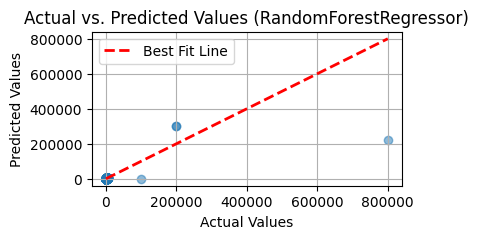

In [41]:
plt.figure(figsize=(4, 2))
plt.scatter(y_cost_test, y_cost_pred_best_rf, alpha=0.5)
plt.title("Actual vs. Predicted Values (RandomForestRegressor)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

x_line = np.linspace(min(y_cost_test), max(y_cost_test), 100)
y_line = x_line
plt.plot(x_line, y_line, color='red', linestyle='--', linewidth=2, label='Best Fit Line')
plt.legend()
plt.show()

Checking the model prediction on sample data

In [42]:
sample_data1 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Price range': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

In [43]:
import joblib

model1 = best_rf_reg_model

model_filename1 = 'model_filename1.pkl'

joblib.dump(model1, model_filename1)

['model_filename1.pkl']

In [44]:
loaded_model = joblib.load('model_filename1.pkl')

sample_data_scaled1 = scaler.transform(sample_data1)
predicted_cost = loaded_model.predict(sample_data_scaled1)


print(f"Predicted Average Cost for Two: {predicted_cost[0]:.2f}")

Predicted Average Cost for Two: 1633.06


## Part two: Predicting the Price Range using Classification Models

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

Splitting the data into Target and Fetaure variables

In [46]:
X_range = zom_df.drop(['Price range'], axis=1)
y_range = zom_df['Price range']

Splitting the data into Test and Train Data

In [47]:
X_range_train, X_range_test, y_range_train, y_range_test = train_test_split(X_range, y_range, test_size=0.2, random_state=42)

Data Preprocessing

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_range_train_scaled = scaler.fit_transform(X_range_train)
X_range_test_scaled = scaler.transform(X_range_test)

Building and Evaluating the Classification Models:
The price range is a categorical variable and hence we are building a classifier

In [49]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC()
}


for model_name, model in models.items():
    model.fit(X_range_train, y_range_train)
    y_pred2 = model.predict(X_range_test)

    accuracy = accuracy_score(y_range_test, y_pred2)
    conf_matrix = confusion_matrix(y_range_test, y_pred2)
    class_report = classification_report(y_range_test, y_pred2)

    print(f"{model_name} Model:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("\n")

    n_splits = 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_range_train, y_range_train, cv=cv, scoring='accuracy')

    print("Cross-Validation Scores:", scores)
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print(f"Standard Deviation: {scores.std():.2f}")
    print("------------------------------------------------------------------------------------------------")
    print("\n")

Logistic Regression Model:
Accuracy: 0.76
Confusion Matrix:
[[806  82   2  17]
 [ 66 505  20  30]
 [ 13 117 127  10]
 [  7  22  81   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       907
           1       0.70      0.81      0.75       621
           2       0.55      0.48      0.51       267
           3       0.10      0.05      0.07       116

    accuracy                           0.76      1911
   macro avg       0.56      0.56      0.56      1911
weighted avg       0.74      0.76      0.74      1911



Cross-Validation Scores: [0.79908377 0.76897906 0.76243455 0.76439791 0.7604712 ]
Mean Accuracy: 0.77
Standard Deviation: 0.01
------------------------------------------------------------------------------------------------


Decision Tree Model:
Accuracy: 0.97
Confusion Matrix:
[[903   4   0   0]
 [  5 608   7   1]
 [  0  14 241  12]
 [  0   0  14 102]]
Classification Report:
              precision

Based on the metrics above, Decision Tree, Random Forest, and Gradient Boosting models perform well with high accuracy and cross-validation results are consistent.

Logistic Regression and Support Vector Classifier also perform well, but have the lower accuracy compared to the other models.

I have chosen the **Random Forest Classifier** as it can handle class imbalance and unseen data.

## Hyperparameter Tuning:
The model seems to be overfitting, hence performing Hyperparameter Tuning on Random Forest Classifier

In [50]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_range_train, y_range_train)


best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_range_train, y_range_train)

y_pred2 = best_rf_classifier.predict(X_range_test)

accuracy = accuracy_score(y_range_test, y_pred2)
conf_matrix = confusion_matrix(y_range_test, y_pred2)
class_report = classification_report(y_range_test, y_pred2)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
Accuracy: 0.9665096807953951
Confusion Matrix:
 [[903   4   0   0]
 [  4 612   5   0]
 [  0  16 239  12]
 [  0   1  22  93]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       907
           1       0.97      0.99      0.98       621
           2       0.90      0.90      0.90       267
           3       0.89      0.80      0.84       116

    accuracy                           0.97      1911
   macro avg       0.94      0.92      0.93      1911
weighted avg       0.97      0.97      0.97      1911



With hyperparameter tuning, the model achieved an accuracy of approximately 96.65% on the test data. The overfitting has also reduced. The confusion matrix and classification report show that the model is performing well across different classes.

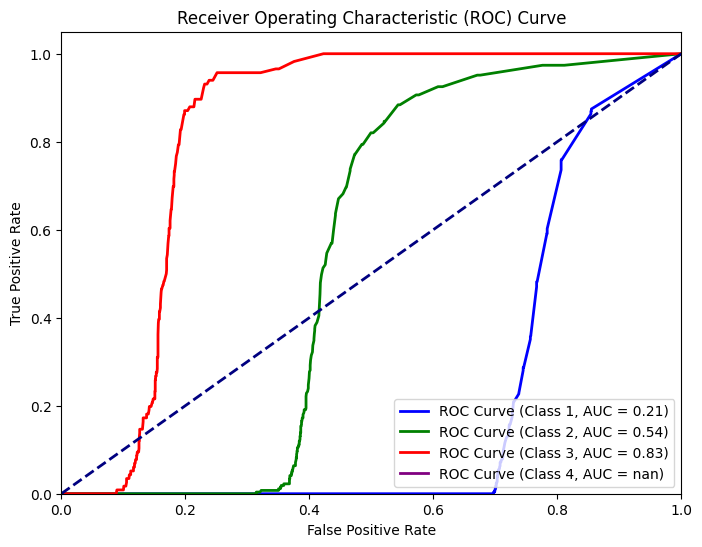

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_range_test_bin = label_binarize(y_range_test, classes=[1, 2, 3, 4])

y_prob = best_rf_classifier.predict_proba(X_range_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_range_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC Curve (Class {i+1}, AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Checking the model prediction on sample data

In [52]:
sample_data2 = pd.DataFrame({
    'Country Code': [162],
    'City': [23],
    'Locality': [35],
    'Locality Verbose': [89],
    'Longitude': [131.02235],
    'Latitude': [4.565443],
    'Cuisines': [881],
    'Average Cost for two': [1340],
    'Has Table booking': [1],
    'Has Online delivery': [1],
    'Is delivering now': [0],
    'Switch to order menu': [1],
    'Aggregate rating': [2.8],
    'Rating color': [0],
    'Rating text': [4],
    'Votes': [714]
})

In [53]:
model2 = best_rf_classifier

model_filename2 = 'model_filename2.pkl'

joblib.dump(model2, model_filename2)

['model_filename2.pkl']

In [54]:
loaded_model2 = joblib.load(model_filename2)

In [55]:
predicted_price_range = loaded_model2.predict(sample_data2)

print(f"Predicted Price Range: {predicted_price_range[0]}")

Predicted Price Range: 2
